In [1]:
import pandas as pd
import pickle
from scipy import stats
import pandas as pd
import seaborn as sns
import pingouin as pg
import statsmodels.formula.api as s
import numpy as np

c:\Python310\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
dropout = pickle.load(open( '../00_data/final/dropout_per_session.pkl','rb') )
dropout = dropout[['UserID','dropout']]
final = pickle.load(open( '../00_data/final/competence.pkl','rb') )
final = final.sort_values(by=['ability'])
n = 10
low_performer = final.head(int(len(final)*(n/100)))

final = final.sort_values(by=['ability'], ascending=False)
high_performer = final.head(int(len(final)*(n/100)))

In [3]:
high_performer = pd.merge(high_performer, dropout, on='UserID', how='left')
low_performer = pd.merge(low_performer, dropout, on='UserID', how='left')

In [4]:
low_intvcontrol = low_performer[(low_performer['interventiongroup']=='control')]
low_intv2 = low_performer[(low_performer['interventiongroup']=='2')]
low_intv3 = low_performer[(low_performer['interventiongroup']=='3')]
low_intv4 = low_performer[(low_performer['interventiongroup']=='4')]
low_intv5 = low_performer[(low_performer['interventiongroup']=='5')]
low_intv6 = low_performer[(low_performer['interventiongroup']=='6')]

high_intvcontrol = high_performer[(high_performer['interventiongroup']=='control')]
high_intv2 = high_performer[(high_performer['interventiongroup']=='2')]
high_intv3 = high_performer[(high_performer['interventiongroup']=='3')]
high_intv4 = high_performer[(high_performer['interventiongroup']=='4')]
high_intv5 = high_performer[(high_performer['interventiongroup']=='5')]
high_intv6 = high_performer[(high_performer['interventiongroup']=='6')]

<AxesSubplot:xlabel='dropout', ylabel='Count'>

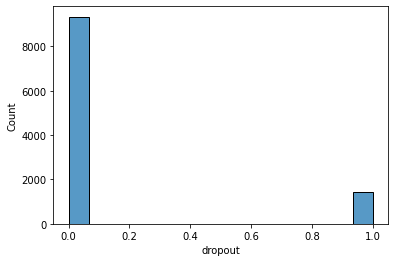

In [5]:
sns.histplot(data=high_performer, x="dropout")

<AxesSubplot:xlabel='dropout', ylabel='Count'>

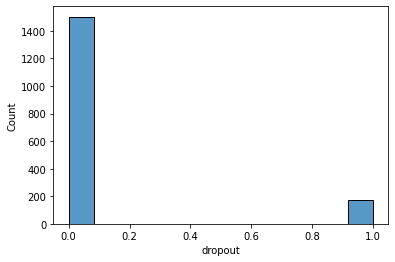

In [6]:
sns.histplot(data=low_performer, x="dropout")

Uebersicht Effektgroeßen

In [7]:
dropout_by_group = high_performer.groupby(['interventiongroup']).agg({'dropout':'mean','Geschlecht':'count'})
dropout_by_group = dropout_by_group.rename(columns={'Geschlecht':'count'})
dropout_by_group

,dropout,count
interventiongroup,,
2,0.125209,1797
3,0.135823,1848
4,0.144266,1622
5,0.184305,1389
6,0.092447,1655
control,0.123115,2453


In [8]:
dropout_by_group = low_performer.groupby(['interventiongroup']).agg({'dropout':'mean','Geschlecht':'count'})
dropout_by_group = dropout_by_group.rename(columns={'Geschlecht':'count'})
dropout_by_group

,dropout,count
interventiongroup,,
2,0.086957,253
3,0.073913,230
4,0.112903,248
5,0.154394,421
6,0.111588,233
control,0.048276,290


In [9]:
# Kruskal Wallis Test 
stats.kruskal(high_intvcontrol['dropout'], high_intv2['dropout'], high_intv3['dropout'],high_intv4['dropout'],high_intv5['dropout'],high_intv6['dropout'])


KruskalResult(statistic=60.532208515986504, pvalue=9.43489929266464e-12)

In [10]:
# Kruskal Wallis Test 
stats.kruskal(low_intvcontrol['dropout'], low_intv2['dropout'], low_intv3['dropout'],low_intv4['dropout'],low_intv5['dropout'],low_intv6['dropout'])


KruskalResult(statistic=24.746392030987572, pvalue=0.0001559535749827188)

In [11]:
#Wilcoxon Mann Whitney Test
print(stats.mannwhitneyu(high_intvcontrol['dropout'], high_intv2['dropout']))
print(stats.mannwhitneyu(high_intvcontrol['dropout'], high_intv3['dropout']))
print(stats.mannwhitneyu(high_intvcontrol['dropout'], high_intv4['dropout']))
print(stats.mannwhitneyu(high_intvcontrol['dropout'], high_intv5['dropout']))
print(stats.mannwhitneyu(high_intvcontrol['dropout'], high_intv6['dropout']))



MannwhitneyuResult(statistic=2199405.0, pvalue=0.837897612616841)
MannwhitneyuResult(statistic=2237768.5, pvalue=0.21781226256972763)
MannwhitneyuResult(statistic=1947304.0, pvalue=0.05055272613607949)
MannwhitneyuResult(statistic=1599363.5, pvalue=2.3266373542676825e-07)
MannwhitneyuResult(statistic=2092108.0, pvalue=0.0021297165529557587)


In [12]:
#Wilcoxon Mann Whitney Test
print(stats.mannwhitneyu(low_intvcontrol['dropout'], low_intv2['dropout']))
print(stats.mannwhitneyu(low_intvcontrol['dropout'], low_intv3['dropout']))
print(stats.mannwhitneyu(low_intvcontrol['dropout'], low_intv4['dropout']))
print(stats.mannwhitneyu(low_intvcontrol['dropout'], low_intv5['dropout']))
print(stats.mannwhitneyu(low_intvcontrol['dropout'], low_intv6['dropout']))


MannwhitneyuResult(statistic=35266.0, pvalue=0.07109596190932503)
MannwhitneyuResult(statistic=32495.0, pvalue=0.22079687564595896)
MannwhitneyuResult(statistic=33636.0, pvalue=0.005401185405140048)
MannwhitneyuResult(statistic=54567.0, pvalue=9.808815785635574e-06)
MannwhitneyuResult(statistic=31646.0, pvalue=0.006839830050777191)
